# 手寫數字分類
### 將測試資料進行分類，找出分類錯誤的圖，並繪製機率分布圖

In [41]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

# 指定亂數種子
seed=7
np.random.seed(seed)
# 載入資料集
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
# 將28*28 圖片轉換成784的向量
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
print("X_train Shape:",X_train.shape)
print("X_test Shapee:",X_test.shape)
# 因為是固定範圍，所以執行正規化，從0~255至0~1
X_train=X_train/255
X_test=X_test/255
#print(X_train[0][150:175])
# One-hot編碼
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
print("Y_train Shape:",Y_train.shape)
print(Y_train[0])
print(Y_test)

X_train Shape: (60000, 28, 28, 1)
X_test Shapee: (10000, 28, 28, 1)
Y_train Shape: (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
# 定義模型
model=Sequential()

# 定義第1組的卷積和池化層
model.add(Conv2D(16, kernel_size=(5,5),padding="same",
                input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 定義第2組的卷積和池化層
model.add(Conv2D(32, kernel_size=(5,5),padding="same",
                input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 定義Dropout、平坦層和全連接層
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary() # 顯示模型摘要資訊

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [43]:
#編譯模型
model.compile(loss="categorical_crossentropy",optimizer="adam",
             metrics=["accuracy"])
#訓練模型
history=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=10,batch_size=128,verbose=2)
#評估模型
print("\nTesting...")
loss,accuracy=model.evaluate(X_train,Y_train)
print("訓練資料集的準確度={:.2f}".format(accuracy))
loss,accuracy=model.evaluate(X_test,Y_test)
print("測試資料集的準確度={:.2f}".format(accuracy))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 23s - loss: 0.4090 - accuracy: 0.8695 - val_loss: 0.0787 - val_accuracy: 0.9765
Epoch 2/10
 - 23s - loss: 0.1349 - accuracy: 0.9597 - val_loss: 0.0559 - val_accuracy: 0.9821
Epoch 3/10
 - 23s - loss: 0.1044 - accuracy: 0.9684 - val_loss: 0.0483 - val_accuracy: 0.9859
Epoch 4/10
 - 24s - loss: 0.0871 - accuracy: 0.9731 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 5/10
 - 24s - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 6/10
 - 23s - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0338 - val_accuracy: 0.9901
Epoch 7/10
 - 24s - loss: 0.0637 - accuracy: 0.9806 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 8/10
 - 23s - loss: 0.0583 - accuracy: 0.9826 - val_loss: 0.0317 - val_accuracy: 0.9911
Epoch 9/10
 - 24s - loss: 0.0540 - accuracy: 0.9839 - val_loss: 0.0313 - val_accuracy: 0.9906
Epoch 10/10
 - 25s - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0317 - val_accuracy: 0.9912

Testing.

In [44]:
print("Saving Model: mnist02.h5...")
model.save("./data/mnist02.h5")

Saving Model: mnist02.h5...


In [61]:
import pandas as pd
from keras.models import load_model

seed=7
np.random.seed(seed)
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
X_test=X_test/255
# One-hot編碼
Y_test_bk=Y_test.copy() # 備份Y_test資料集
Y_test=to_categorical(Y_test)

In [62]:
model=Sequential()
model=load_model("./data/mnist02.h5")
#編譯模型
model.compile(loss="categorical_crossentropy",optimizer="adam",
             metrics=["accuracy"])
#評估模型
print("Testing...")
loss,accuracy=model.evaluate(X_test,Y_test)
print("測試資料集的準確度={:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting...")
Y_pred=model.predict_classes(X_test)
# 顯示混淆矩陣
tb=pd.crosstab(Y_test_bk.astype(int),Y_pred.astype(int),
              rownames=["label"],colnames=["predict"])
print(tb)

Testing...
10000/10000 [==============================] - 1s 115us/step
測試資料集的準確度=0.99

Predicting...
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        975     1     0     0    0    0    3     1    0    0
1          0  1134     1     0    0    0    0     0    0    0
2          1     0  1029     0    0    0    0     2    0    0
3          0     0     1  1006    0    1    0     1    1    0
4          0     1     0     0  978    0    0     0    0    3
5          1     0     0     4    0  881    3     1    0    2
6          4     4     0     0    1    1  948     0    0    0
7          0     2     6     1    0    0    0  1017    1    1
8          3     2     2     1    0    0    2     2  961    1
9          2     3     1     0    6    1    0     3    2  991


In [56]:
print(len(Y_pred))

10000


In [64]:
Y_test=Y_test_bk.flatten()
df = pd.DataFrame({'label':Y_test, 'predict':Y_pred})
df=df[Y_test!=Y_pred] # 篩選出分類錯誤的資料
print(df.head())

     label  predict
259      6        0
321      2        7
340      5        3
445      6        0
495      8        6


In [115]:
# 隨機選1個錯誤分類的數字索引
#i=df.sample(n=1).index.values.astype(int)[0]
#print("Tndex:",i)
#img=X_test[i]
i=df.index
print("Tndex:",i)
img=X_test[i]
#for a in i:
    #print(a)

Tndex: Int64Index([ 259,  321,  340,  445,  495,  582,  740,  947,  965, 1014, 1033,
            1039, 1226, 1232, 1247, 1260, 1299, 1319, 1393, 1522, 1530, 1621,
            1754, 1878, 1901, 1955, 2109, 2118, 2129, 2130, 2135, 2293, 2387,
            2414, 2462, 2597, 2654, 2896, 3073, 3503, 3520, 3558, 3662, 3767,
            3778, 3808, 3850, 3869, 3985, 4078, 4163, 4176, 4238, 4256, 4497,
            4500, 4699, 4740, 4761, 4807, 5937, 5955, 5981, 5997, 6505, 6576,
            6597, 6625, 6651, 8095, 8325, 8520, 9009, 9015, 9634, 9642, 9679,
            9692, 9729, 9770],
           dtype='int64')


In [87]:
print(df)

      label  predict
259       6        0
321       2        7
340       5        3
445       6        0
495       8        6
...     ...      ...
9642      9        7
9679      6        1
9692      9        7
9729      5        6
9770      5        6

[80 rows x 2 columns]


In [160]:
print(len(X_test))

10000


In [177]:
print(i[1])

321


Predicting...


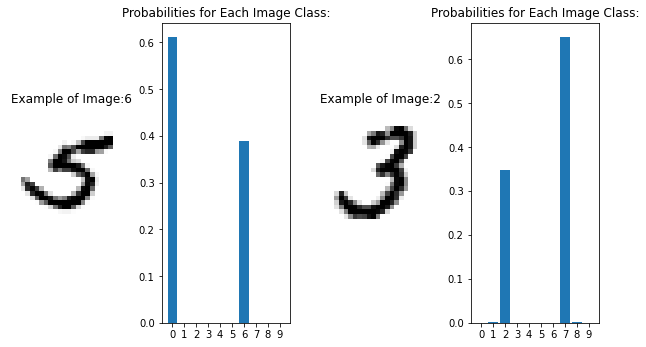

Predicting...


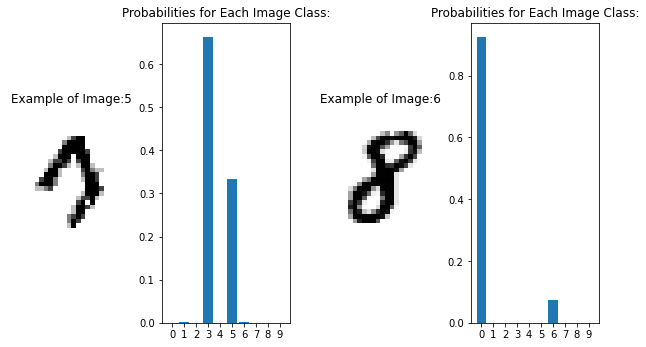

Predicting...


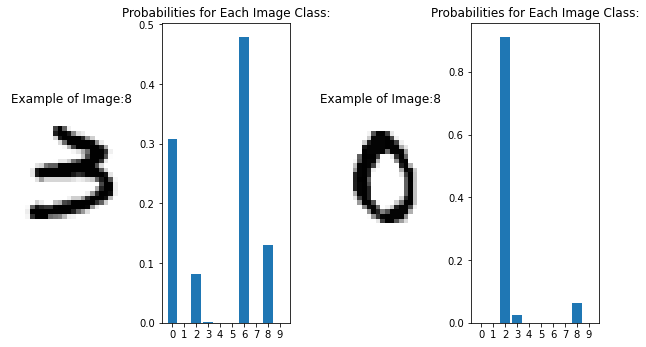

Predicting...


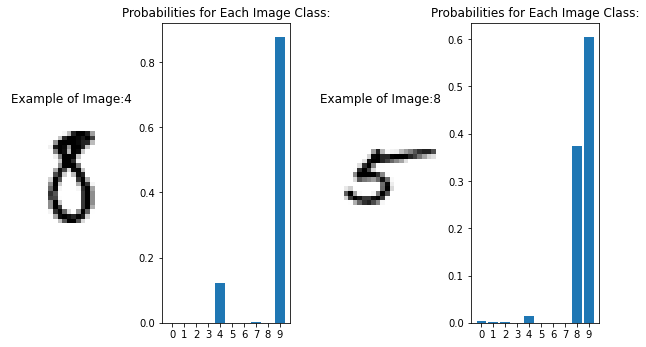

Predicting...


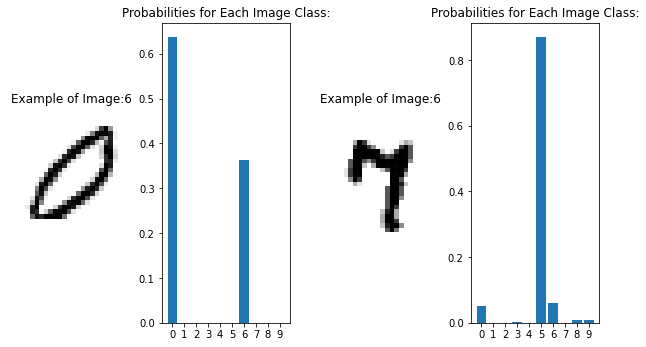

Predicting...


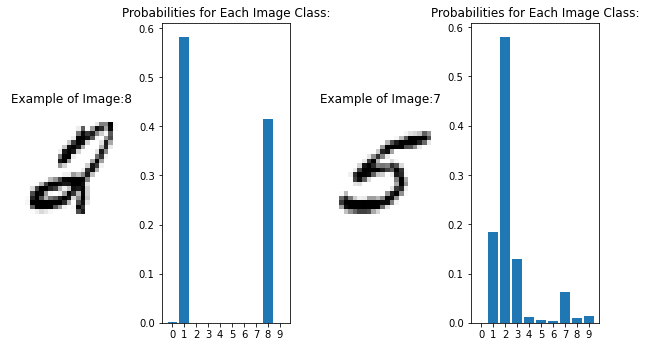

Predicting...


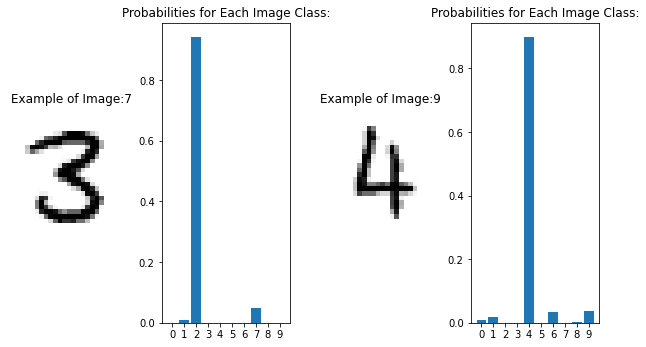

Predicting...


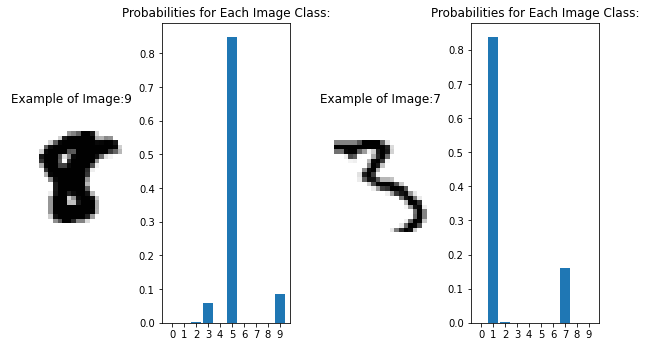

Predicting...


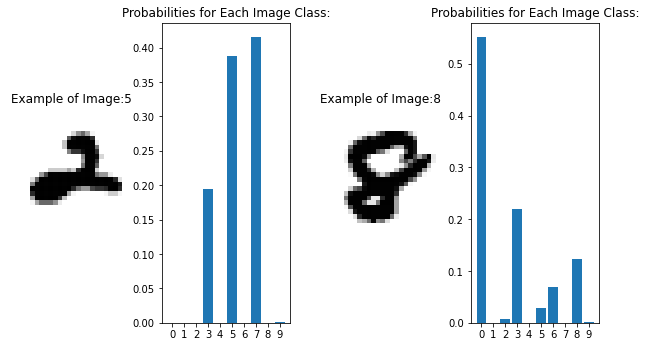

Predicting...


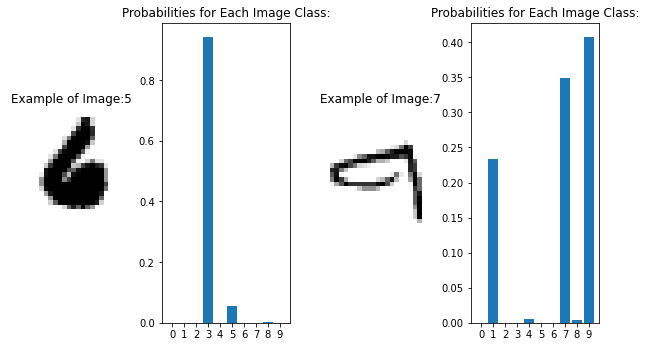

Predicting...


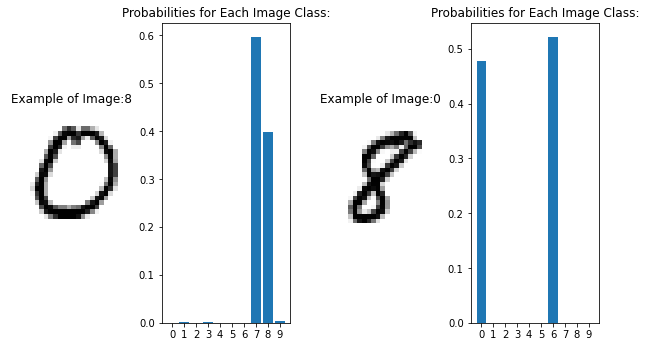

Predicting...


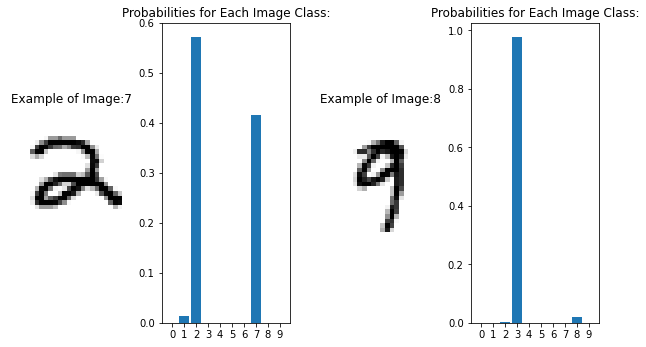

Predicting...


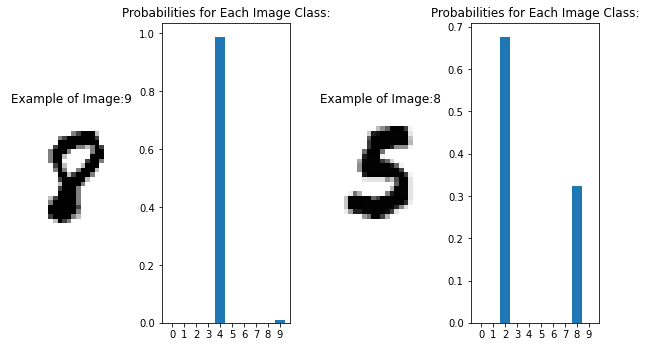

Predicting...


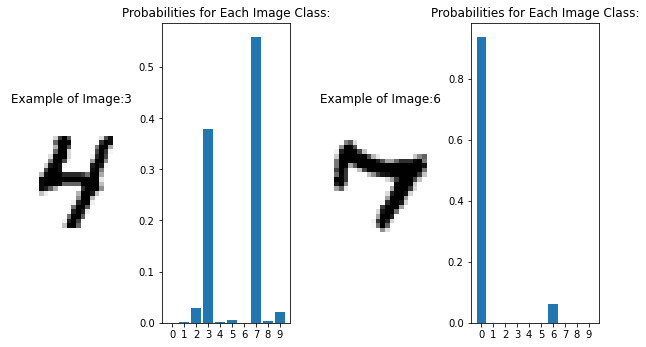

Predicting...


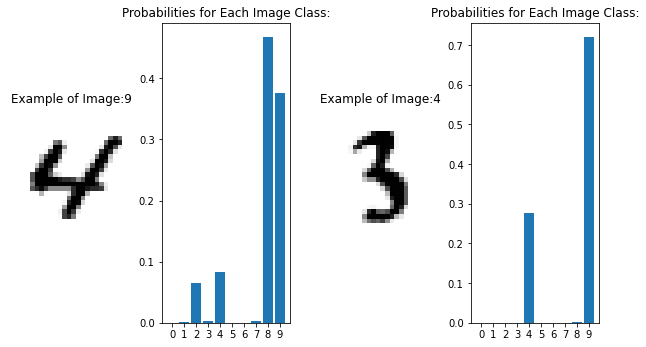

Predicting...


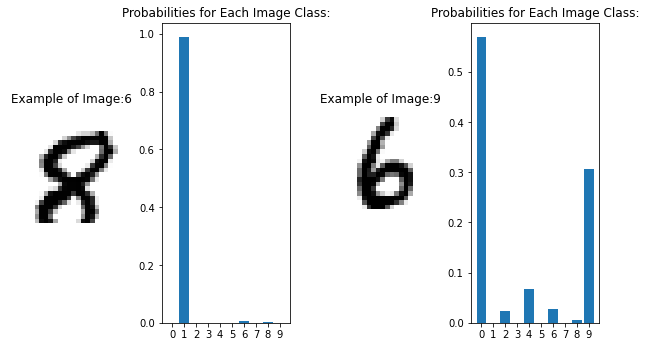

Predicting...


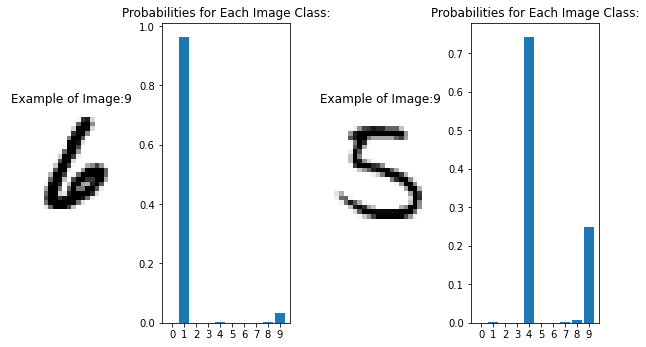

Predicting...


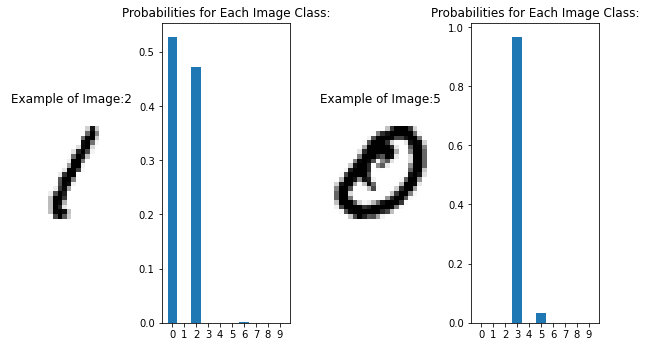

Predicting...


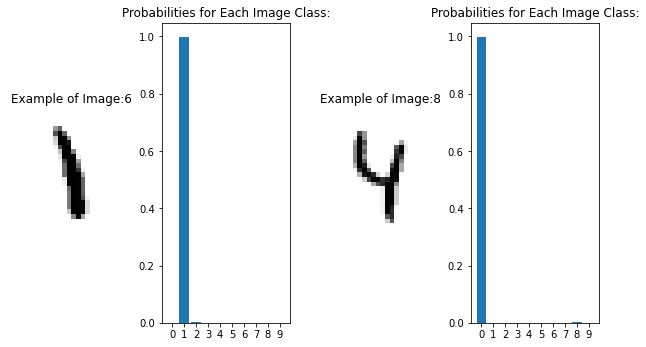

Predicting...


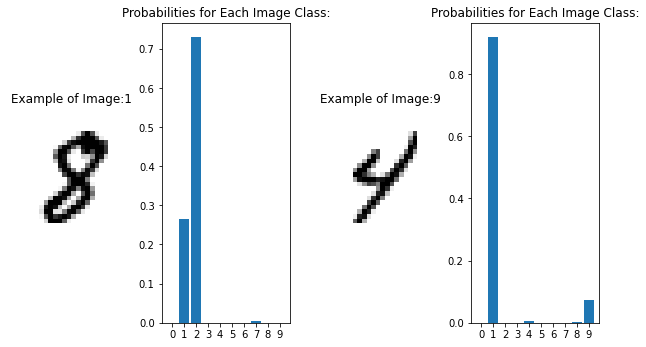

Predicting...


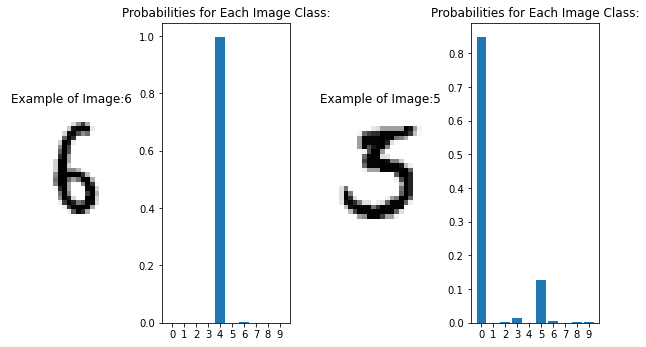

Predicting...


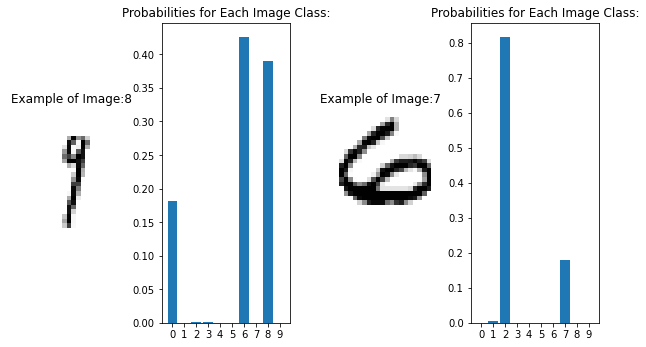

Predicting...


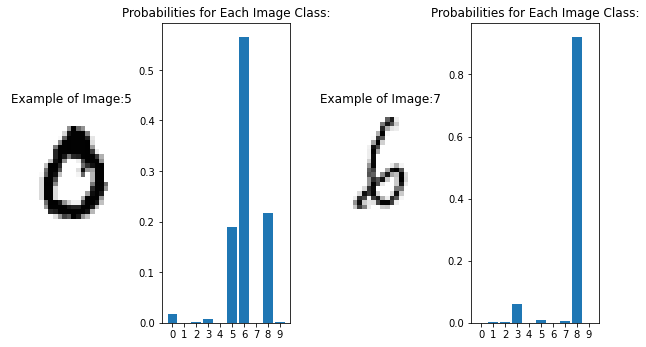

Predicting...


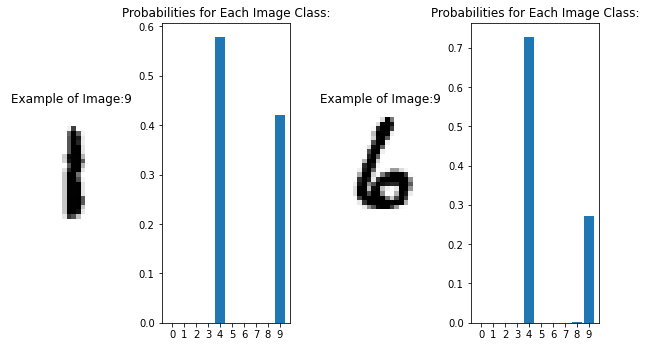

Predicting...


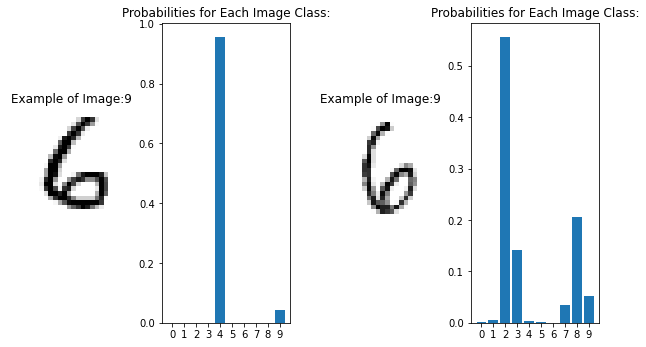

Predicting...


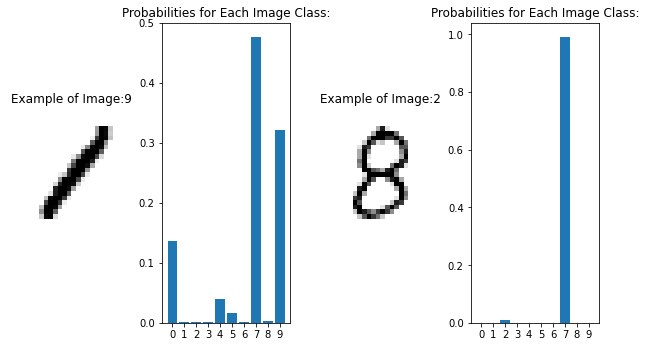

Predicting...


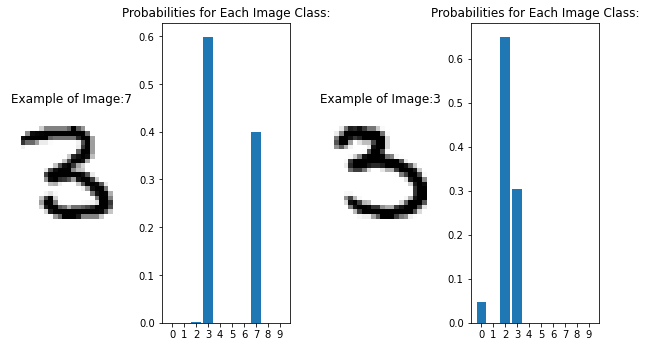

Predicting...


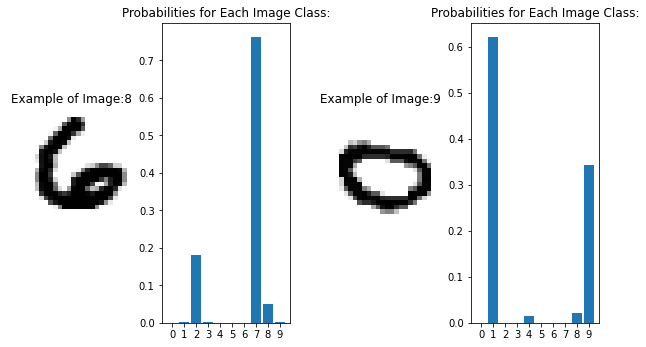

Predicting...


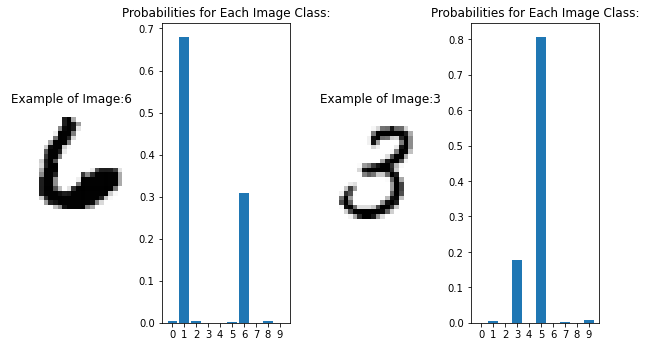

Predicting...


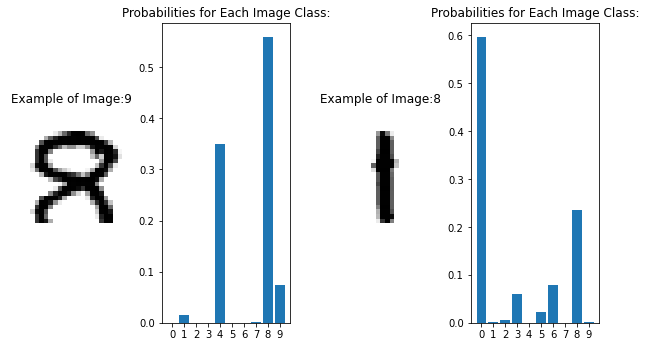

Predicting...


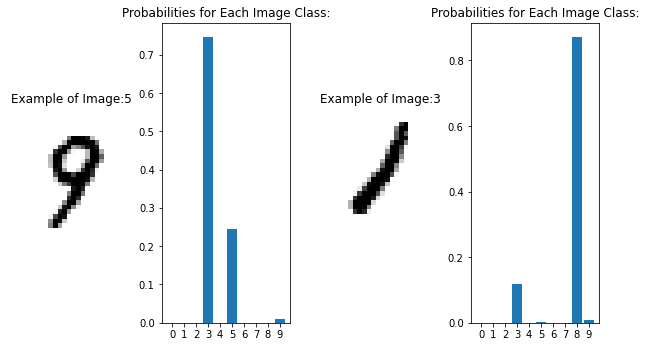

Predicting...


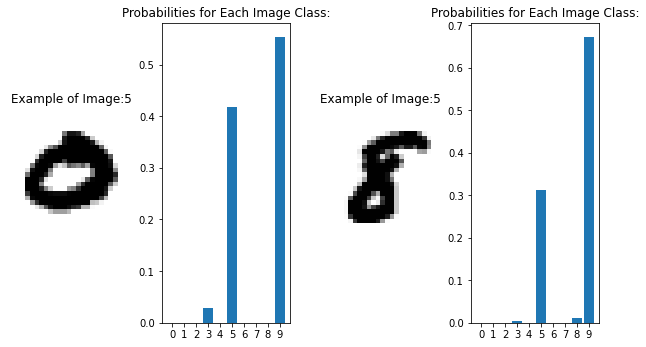

Predicting...


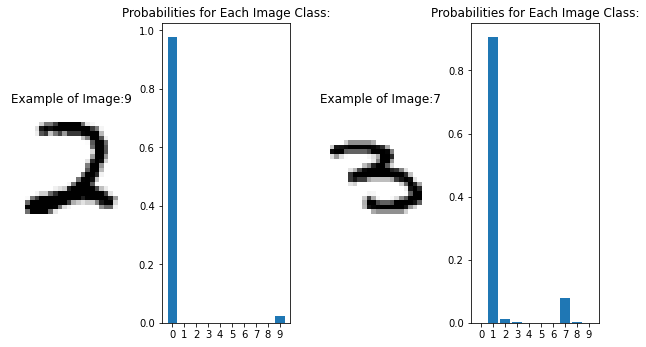

Predicting...


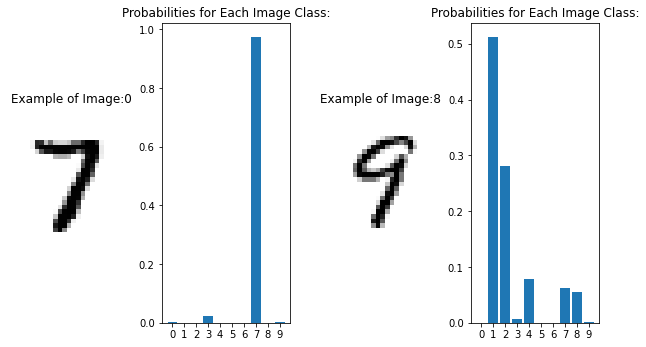

Predicting...


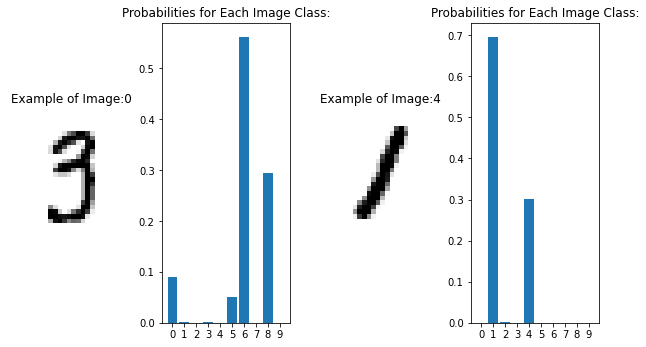

Predicting...


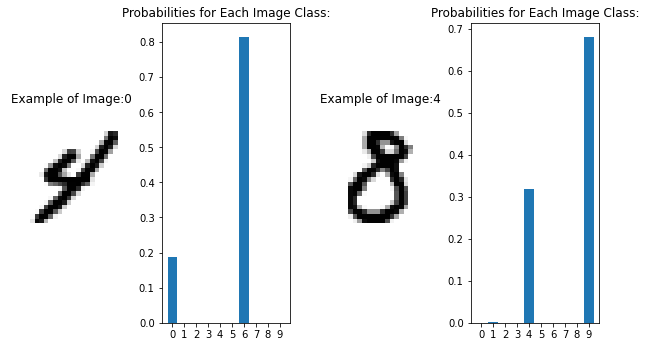

Predicting...


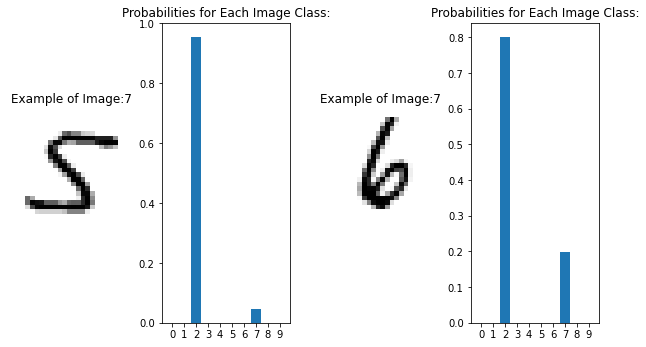

Predicting...


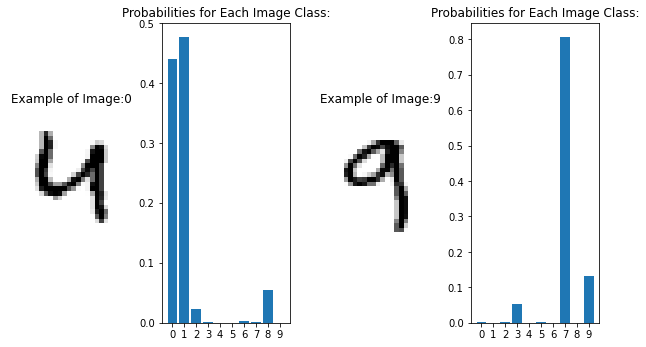

Predicting...


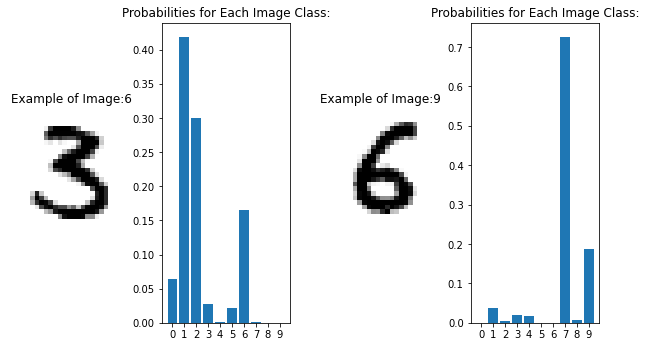

Predicting...


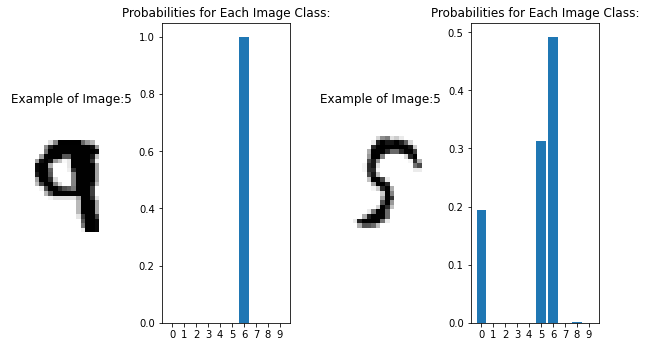

40


In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
(_,_),(_,Y_test)=mnist.load_data()

k=0

for c in range(0,80,2):
    a=i[c]
    b=i[c+1]

    # 繪出圖表的預測結果
    plt.figure(figsize=(7,3))
    plt.subplot(141)
    plt.title("Example of Image:"+str(Y_test[a]))
    plt.imshow(X_train[a],cmap="binary")
    plt.axis("off")

    # 預測結果的機率
    print("Predicting...")
    probs=model.predict_proba(X_test)
    plt.subplot(142)
    plt.title("Probabilities for Each Image Class:")
    plt.bar(np.arange(10),Y_probs[a].reshape(10),align="center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    
   


    # 繪出圖表的預測結果
    plt.subplot(143)
    plt.title("Example of Image:"+str(Y_test[b]))
    plt.imshow(X_train[b],cmap="binary")
    plt.axis("off")

    # 預測結果的機率
    plt.subplot(144)
    probs=model.predict_proba(X_test)
    plt.title("Probabilities for Each Image Class:")
    plt.bar(np.arange(10),Y_probs[b].reshape(10),align="center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    
    plt.subplots_adjust(left=0.125,
                    bottom=-0.51,
                    right=1.3,
                    top=0.88,
                    wspace=0.2,
                    hspace=0.2)
                   
    plt.show()
    k=k+1
    
print(k)


